# **Housing Price Prediction - Advanced Regression**

## **Project flow**
1. Context
2. Objective
3. Data collection
4. Data pre-checks
5. Exploratory data analysis
6. Feature Engineering
7. Model training
8. Model Selection

## **1. Context**

As a buyer or seller, you want to know the price of a house based on its features such as area, consutruction quality, number of rooms, proximity to various conditions etc. Our objective is to To predict the price of a house as accurately as possible based on these features by making use of supervised machine learning regression algorithms and supervised learning.

## **2. Objective**

To predict sales price of each house ID in the test set

## **3. Data set collection**

#### Dataset source- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques



### **3.1 Data description**

1. **SalePrice** - The property's sale price in dollars. This is the target variable that you're trying to predict.
2. **MSSubClass:** The building class
3. **MSZoning:** The general zoning classification
4. **LotFrontage:** Linear feet of street connected to property
5. **LotArea:** Lot size in square feet
6. **Street:** Type of road access
7. **Alley:** Type of alley access
8. **LotShape:** General shape of property
9. **LandContour:** Flatness of the property
10. **Utilities:** Type of utilities available
11. **LotConfig:** Lot configuration
12. **LandSlope:** Slope of property
13. **Neighborhood:** Physical locations within Ames city limits
14. **Condition1:** Proximity to main road or railroad
14. **Condition2:** Proximity to main road or railroad (if a second is present)
15. **BldgType:** Type of dwelling
16. **HouseStyle:** Style of dwelling
17. **OverallQual:** Overall material and finish quality
18. **OverallCond:** Overall condition rating
20. **YearBuilt:** Original construction date
21. **YearRemodAdd:** Remodel date
22. **RoofStyle:** Type of roof
23. **RoofMatl:** Roof material
24. **Exterior1st:** Exterior covering on house
25. **Exterior2nd:** Exterior covering on house (if more than one material)
26. **MasVnrType:** Masonry veneer type
27. **MasVnrArea:** Masonry veneer area in square feet
28. **ExterQual:** Exterior material quality
29. **ExterCond:** Present condition of the material on the exterior
30. **Foundation:** Type of foundation
31. **BsmtQual:** Height of the basement
32. **BsmtCond:** General condition of the basement
33. **BsmtExposure:** Walkout or garden level basement walls
34. **BsmtFinType1:** Quality of basement finished area
35. **BsmtFinSF1:** Type 1 finished square feet
36. **BsmtFinType2:** Quality of second finished area (if present)
37. **BsmtFinSF2:** Type 2 finished square feet
38. **BsmtUnfSF:** Unfinished square feet of basement area
39. **TotalBsmtSF:** Total square feet of basement area
40.  **Heating:** Type of heating
41. **HeatingQC:** Heating quality and condition
42. **CentralAir:** Central air conditioning
43. **Electrical:** Electrical system
44. **1stFlrSF:** First Floor square feet
45. **2ndFlrSF:** Second floor square feet
46. **LowQualFinSF:** Low quality finished square feet (all floors)
47. **GrLivArea:** Above grade (ground) living area square feet
48. **BsmtFullBath:** Basement full bathrooms
49. **BsmtHalfBath:** Basement half bathrooms
50. **FullBath:** Full bathrooms above grade
51. **HalfBath:** Half baths above grade
52. **Bedroom:** Number of bedrooms above basement level
53. **Kitchen:** Number of kitchens
54. **KitchenQual:** Kitchen quality
55. **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
56. **Functional:** Home functionality rating
57. **Fireplaces:** Number of fireplaces
58. **FireplaceQu:** Fireplace quality
59. **GarageType:** Garage location
60. **GarageYrBlt:** Year garage was built
61. **GarageFinish:** Interior finish of the garage
62. **GarageCars:** Size of garage in car capacity
63. **GarageArea:** Size of garage in square feet
64. **GarageQual:** Garage quality
65. **GarageCond:** Garage condition
66. **PavedDrive:** Paved driveway
67. **WoodDeckSF:** Wood deck area in square feet
68. **OpenPorchSF:** Open porch area in square feet
69. **EnclosedPorch:** Enclosed porch area in square feet
70. **3SsnPorch:** Three season porch area in square feet
71. **ScreenPorch:** Screen porch area in square feet
72. **PoolArea:** Pool area in square feet
73. **PoolQC:** Pool quality
74. **Fence:** Fence quality
75. **MiscFeature:** Miscellaneous feature not covered in other categories
76. **MiscVal:** Value of miscellaneous feature
77. **MoSold:** Month Sold
78. **YrSold:** Year Sold
79. **SaleType:** Type of sale
80. **SaleCondition:** Condition of sale

### **3.3 Defining path to data**

In [5]:
train_path='C:\\evodia_tech_projects\\housingprice\\Notebook\\data\\train.csv'
test_path='C:\\evodia_tech_projects\\housingprice\\Notebook\\data\\test.csv'

### **3.4 Importing necessary libraries**

In [26]:
# importing libraries for data manipulation
import pandas as pd
import numpy as np

# importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing preprocessing libraries
from sklearn.model_selection import train_test_split,KFold,cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import calendar
from pandas.api.types import CategoricalDtype

# importing libraries for model training
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import make_scorer,r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### **3.5 Loading the dataset**

In [7]:
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

## **4. Data Pre-checks**

In [8]:
#setting option for max columns
pd.set_option("display.max_columns",None)

### **4.1 Exploring the dataset**

In [9]:
#checking first 5 entries for train set
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#checking first 5 rows for test set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
#checking datashape for train set
train_df.shape

(1460, 81)

In [12]:
#checking datashape for test set
test_df.shape

(1459, 80)

#### **Observations**
The train set contains 1460 rows and 81 columns where as the test set contains 1459 rows and 80 columns.

The missing column in the test set is for house sale price, the prediction of which is our objective.

To perform further checks on the data, we will merge the two datasets

In [13]:
# Data integration
df=pd.concat([train_df,test_df])
print("The shape of concatenated dataset:",df.shape)

The shape of concatenated dataset: (2919, 81)


In [14]:
#Checking first 5 entries of concatenated dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
#checking last 5 entries for the concatenated dataset
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


#### **Observations**
We can see that the column for sale price in the last 5 entries is NaN, indicating that the values at the end are from the test set

In [16]:
#checking info for train set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

#### **Observations**
The concatenated dataset contains 43 object oriented datatypes and the remaining are numeric

### **4.2 Checking statistical summary**

In [17]:
#checking statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


#### **Observations**
The ID column can be dropped or set as index as it is just an identifier and as such does not add any value to the data


In [18]:
df=df.set_index("Id")

### **4.3 Checking missing values**

In [19]:
pd.set_option('display.max_rows',None) #to display all the rows in the dataframe
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [20]:
# getting missing values percentages for all features
null_percent = pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
y=null_percent.index.to_list()
null_percent.columns=["null_percentages"]
x=null_percent.null_percentages.to_list()

Text(0.5, 1.0, 'null_percentages_for_features')

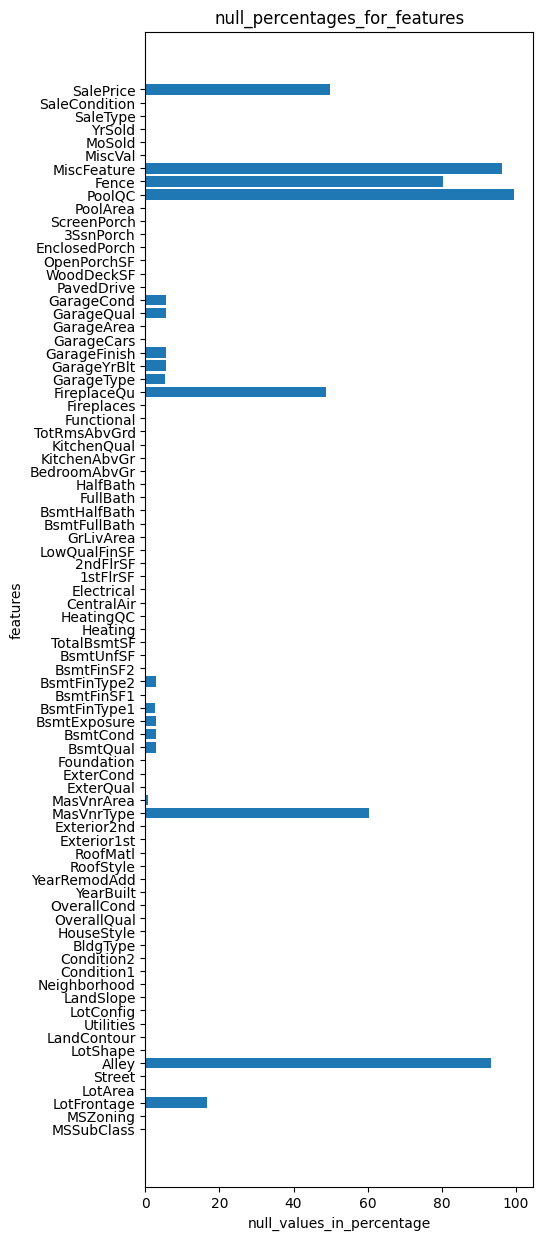

In [21]:
#plotting horizontal bar chart for null values in percentage
plt.figure(figsize=(5,15))
plt.barh(y,x)
plt.ylabel("features")
plt.xlabel("null_values_in_percentage")
plt.title("null_percentages_for_features")

<Axes: ylabel='Id'>

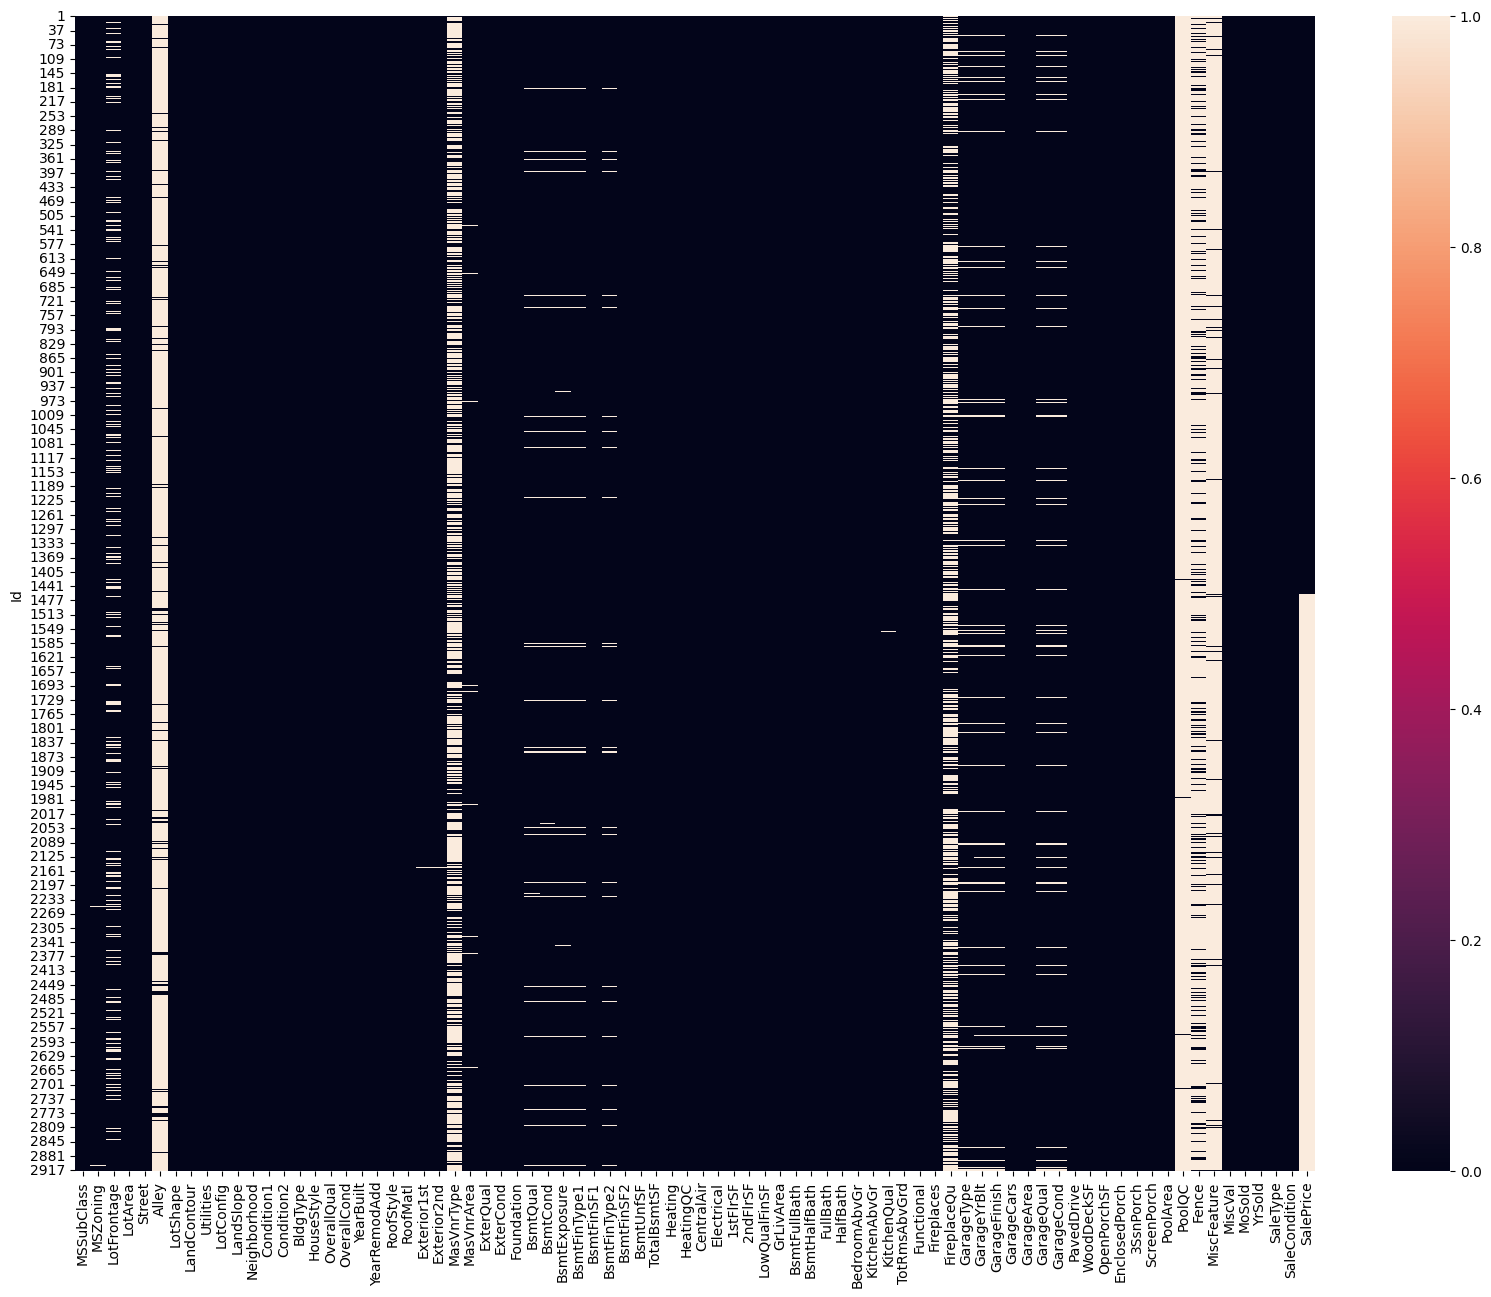

In [22]:
# Visualizing spread of missing values in the datset
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull())

#### **Observations**
1. From the heatmap & the barplot we can see that there a significant number of missing values in "Alley",""FireplaceQu",""PoolQC","Fence" & ""MiscFeature"
2. We can also see that there are some missing values in all Basement related features and they are missing for the same houses. Same is the case with all garage related features
3. Missing values for sale price can be attributed to the empty column in test set and it being our objective to predict these values

### **4.5 Checking unique values in the data**

In [23]:
#checking unique values in the dataset
df.nunique()

MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        991
BsmtFinType2        6
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea 

#### **Observations**
1. A large number of features are categorical
2. Some of the features which are numeric can be treated as categorical as in the case of "MoSold","YrSold","MSSubClass","YearBuilt","YearRemodAdd"

### **4.6 Checking Duplicate values**

In [24]:
#Checking duplicates
df.duplicated().sum()

0

#### **Observations**
There are no duplicate values

## **5. Exploratory Data Analysis**

In [27]:
#creating list of numerical and categorical columns
num_cols=[]
cat_cols=[]

#classifying columns as numerical and categorical
for i in range(0,df.shape[1]):
  if df.dtypes[i]=="object":
    cat_cols.append(df.columns[i])
  else:
    num_cols.append(df.columns[i])

print("Number of Numeric features:",len(num_cols))
print("numerical columns:",num_cols)
print("Number of Categorical features:",len(cat_cols))
print("categorical columns:",cat_cols)


Number of Numeric features: 37
numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Number of Categorical features: 43
categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Centra

### **5.1 Univariate analysis**

**Univariate analysis for numerical columns**

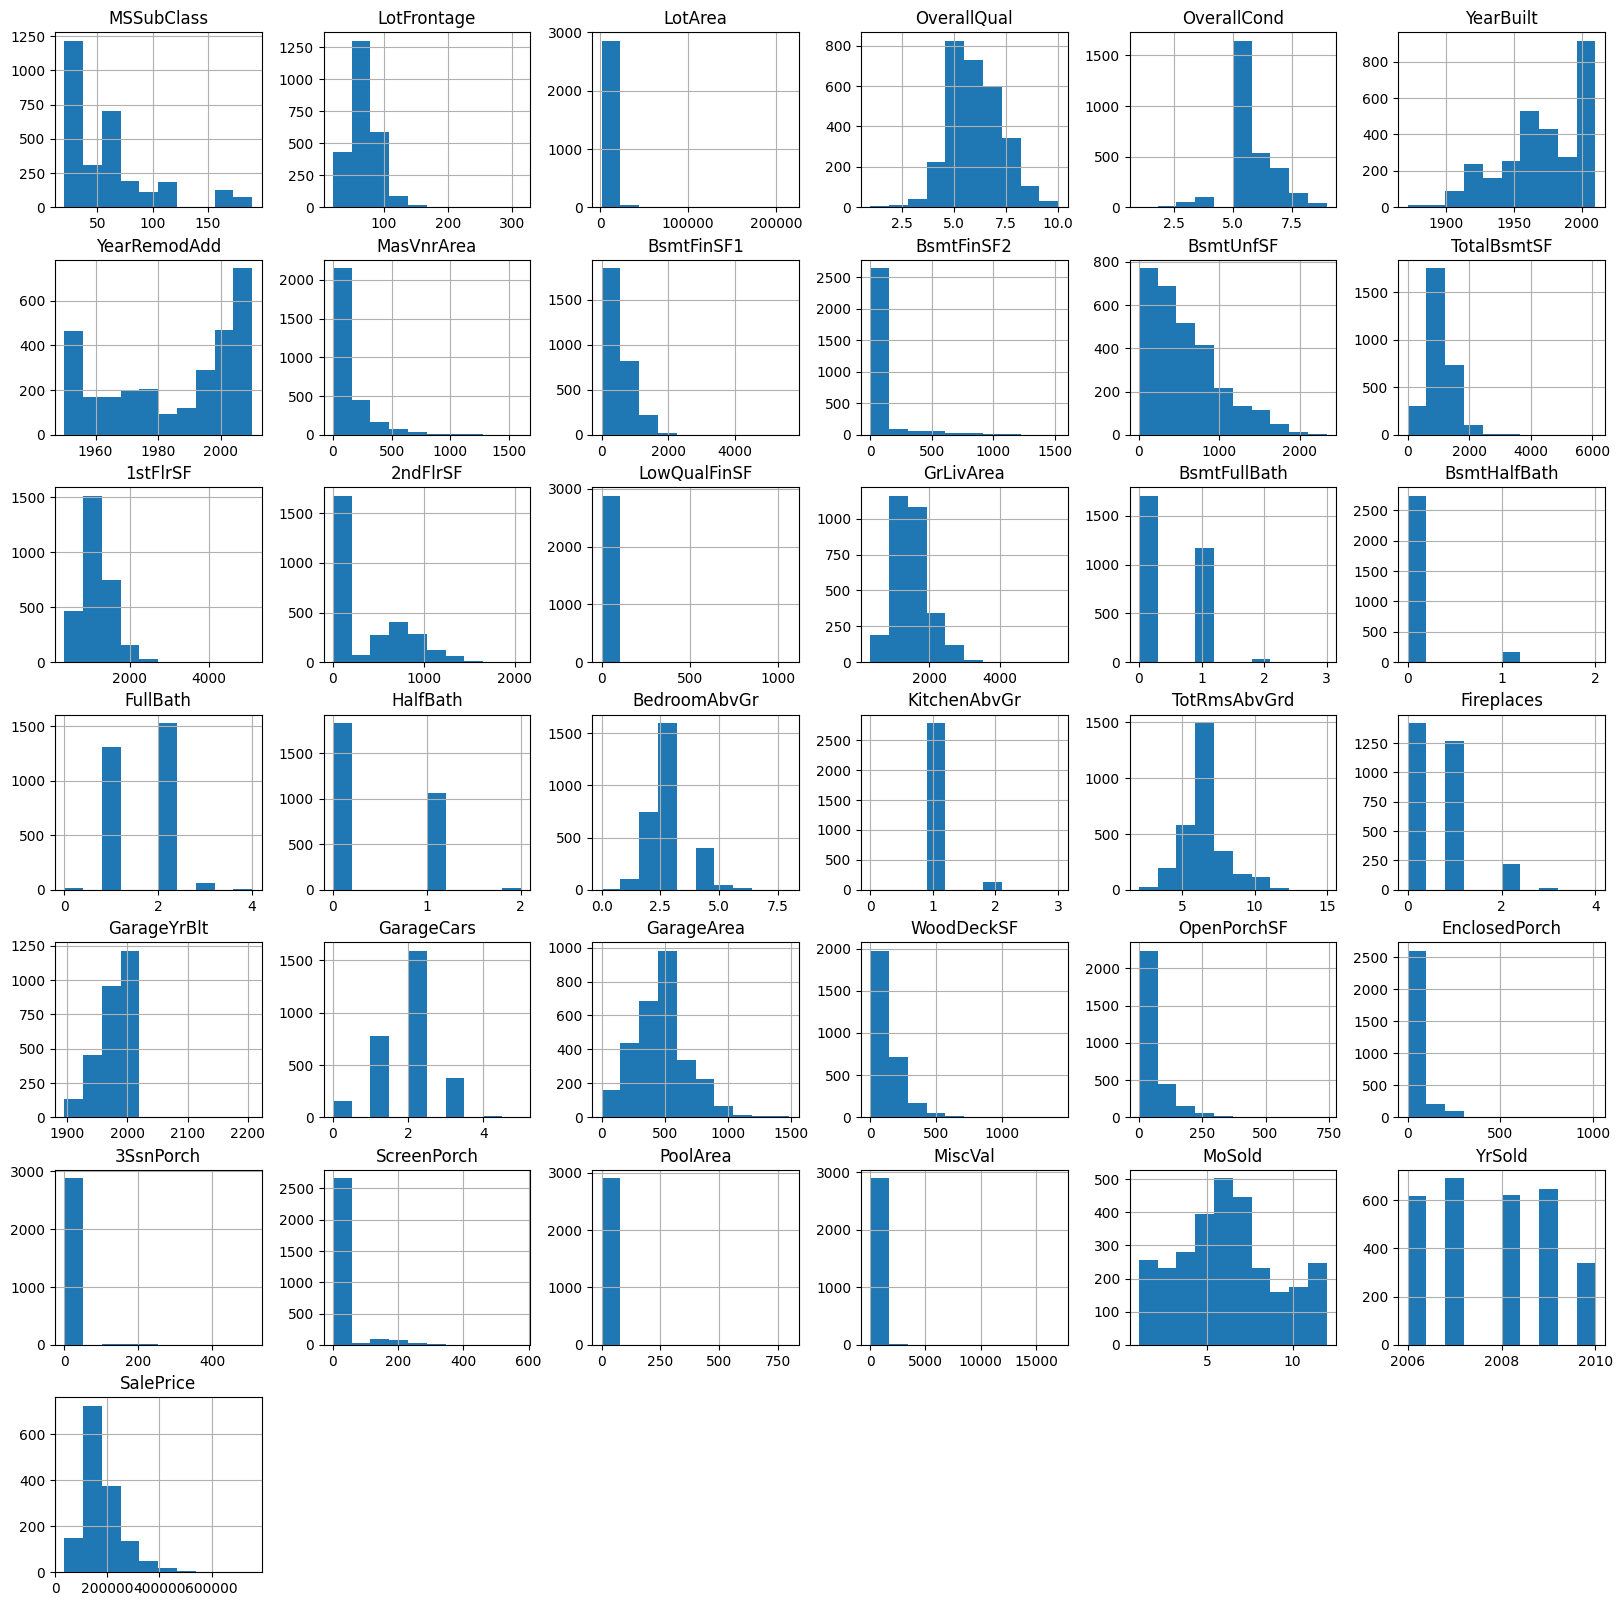

In [28]:
#plotting histograms
df[num_cols].hist(figsize=(20,20))
plt.show()

#### **Observations & Insights**
1. A large number of houses were built around the year 2000
2. The sales for houses has dropped to almost 50% in the year 2010
3. The sales for houses have been high in the months of May, June and July whereas september and october have seen a significant dip in sales
4. More than 50% of the houses were sold at prices less than 2 Million dollars

**A large number of houses(>90%) have following attributes:**
1. LotArea of around 20000 sq.feet
2. Type 2 finished basement of 0 to around 100 sq.feet
3. Low quality finish of 0 to less than 50 sq.feet
4. Do not have basement half bath
5. Have 1 kitchen above grade
6. Have 0 to less than 50 sq.feet of enclosed poarch, 3 season poarch, screen poarch and pool area

**About 50% of the houses have following attributes:**
1. Do not have a basement full bath
2. Do not have a half bath
3. Have 2 full bath
4. Do not have fireplaces



The dependent variable "SalePrice" is skewed and can affect the regression algorithm. We will use log transform to remove skewness

<Axes: xlabel='SalePriceLog', ylabel='Count'>

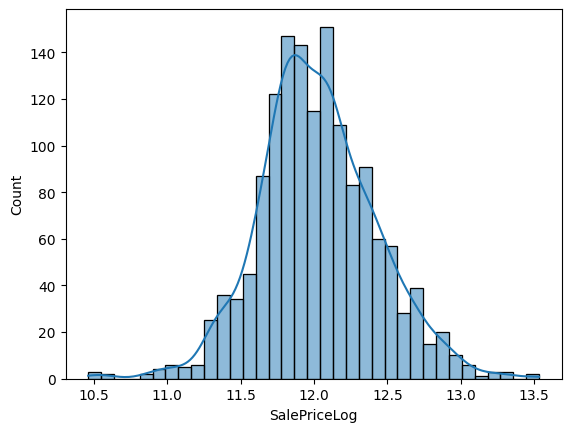

In [29]:
# Taking log transform of "SalePrice"
df["SalePriceLog"]=np.log(df["SalePrice"])
sns.histplot(data=df,x="SalePriceLog",kde=True)

#### We can see that the Skewness is now eliminated

### **Univariate analysis for categorical columns**

In [30]:
# creating a for loop to count and print the number of times each class repeats in a categorical variable
for i in cat_cols:
  print(df[i].value_counts(normalize=True)*100)
  print("-"*50)

MSZoning
RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: proportion, dtype: float64
--------------------------------------------------
Street
Pave    99.5889
Grvl     0.4111
Name: proportion, dtype: float64
--------------------------------------------------
Alley
Grvl    60.606061
Pave    39.393939
Name: proportion, dtype: float64
--------------------------------------------------
LotShape
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: proportion, dtype: float64
--------------------------------------------------
LandContour
Lvl    89.825283
HLS     4.110997
Bnk     4.008222
Low     2.055498
Name: proportion, dtype: float64
--------------------------------------------------
Utilities
AllPub    99.965718
NoSeWa     0.034282
Name: proportion, dtype: float64
--------------------------------------------------
LotConfig
Inside     73.072970
Corner     17.505995
CulDSac     6.029462
FR2         2.911956


## **Observations**


**1. More than 90% of sold houses have below attributes:**
1. Have paved road access to the property
2. Have gravel type alley access to the property
3. Have access to all public utilities(E,G,W & S)
4. Are on a gentle slope
5. Have normal proximity conditions
6. Have standard composite shingle for roof material
7. Have typical basement conditions(slight dampness allowed)
8. Have GasA-Gas forced warm air furnace type of heating
9. Have central air conditioning
10. Have standard circuit breaker & Romex electrical systems
11. Have typical home functionality
12. Have typical/average quality garage & garage condition
13. Have paved driveway
14. Have good pool quality
15. Have minimum privacy from fencing
16. Have a shed(Over 100 Sq.ft)



## **5.2 Bivariate analysis**

We will check how our target variable "Sales" varies with other variables

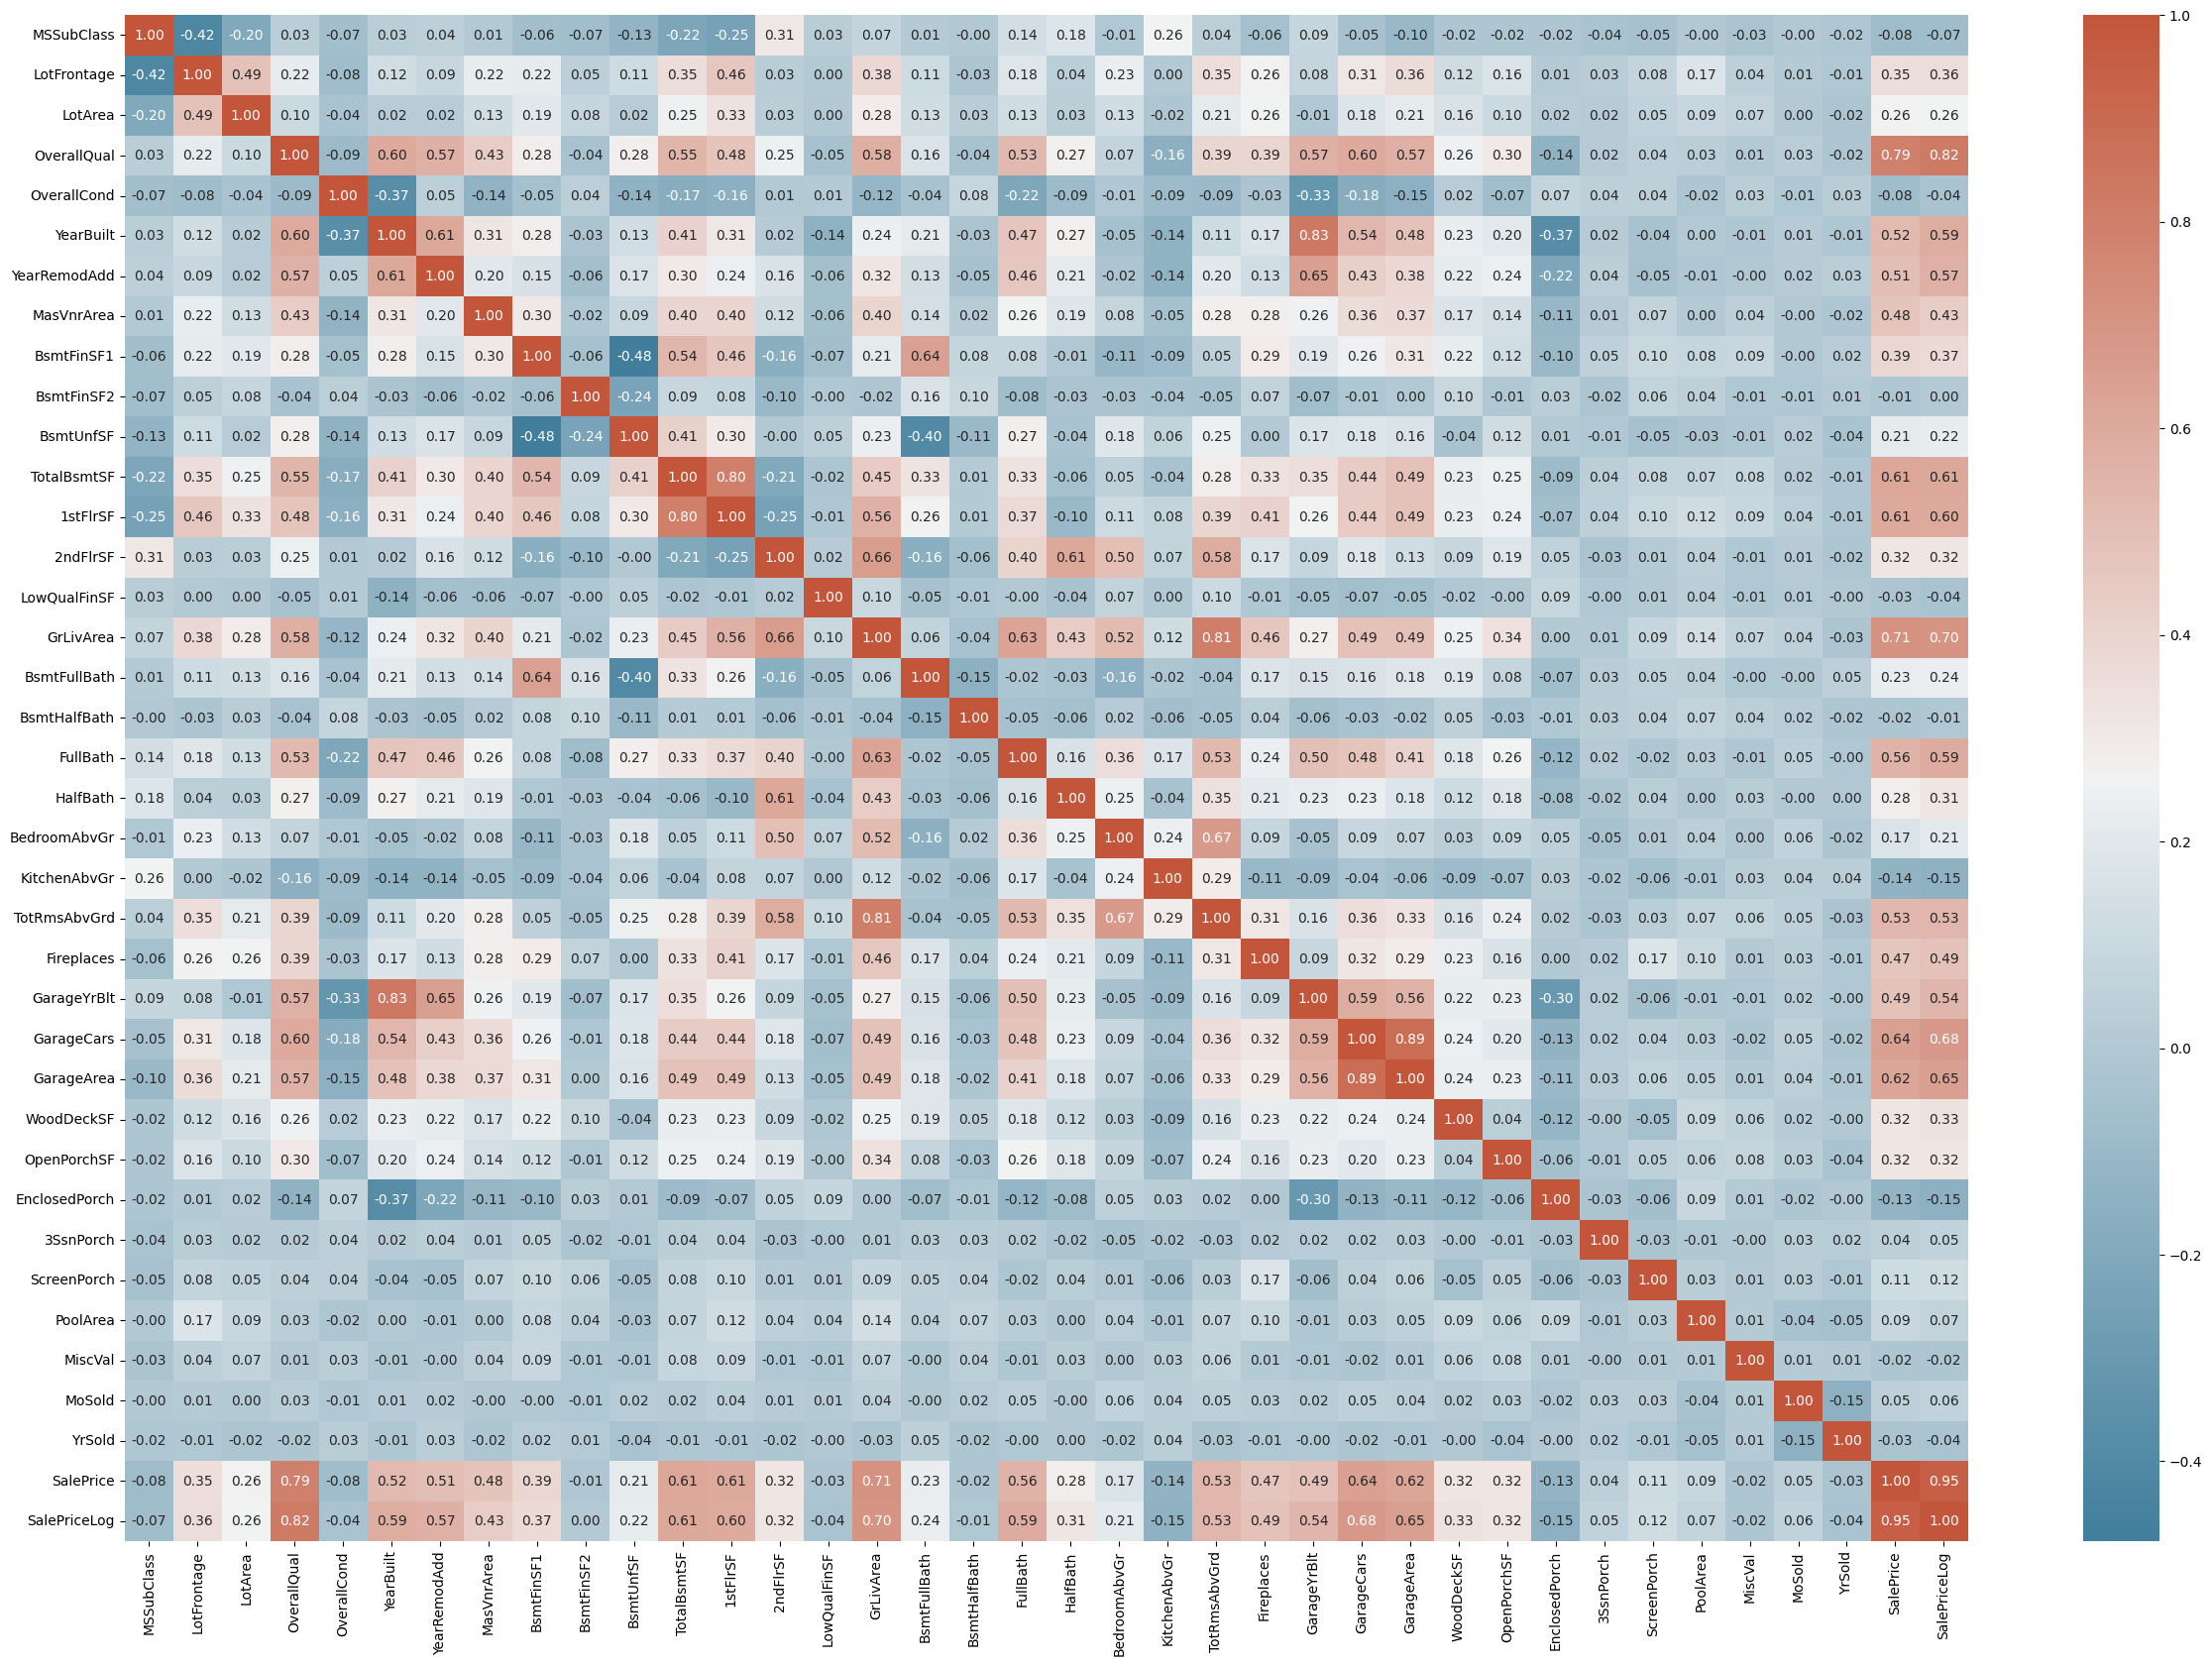

In [34]:
#plotting heatmap
plt.figure(figsize=(30,20))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='0.2f',cmap=cmap)
plt.show()

#### **Observations & insights:**
1. Following varibles show high postive correlation(>0.6) with Saleprice-
'GarageArea','GarageCars','GrLivArea','1stFlrSF','TotalBsmtSF','OverallQual'. It is apparaent that area in sq.feet for garage, 1st floor and basement as well as overall material quality used for building and construction will have significant impact on the saleprice.

2. There is a negative correlation of the variables 'EnclosedPorch' & 'KitchenAbvGr' with 'Saleprice' indicating that people prefer just 1 kitchen and less enclosed porch space

3. We can see that GarageArea and GarageCars is highly correlated which is apparent fromt the fact that more no of cars will require higher garage area

4. Also GarageYrBuilt is highly correlated to YrBuilt indicating that most of the garages were built along with the house and not after.


## **6. Feature Engineering**

### **6.1 Missing Value Imputation**

From the barplot & heatmap plotted in section 4.3, we can consider dropping those features with more than 50% missing values

### **6.1.1 Drop features**

In [35]:
# Dropping "SalePrice" & Using"SalePriceLog"
df=df.drop(columns=["SalePrice"],axis=1)

In [36]:
df.shape

(2919, 80)

In [37]:
# Calculating null percentages for updated dataframe
null_percent=pd.DataFrame(df.isnull().sum()/(df.shape[0])*100)
null_percent.columns=["null_percentages"]

In [38]:
# checking null values with more than 50% missing data
null_percent_above_50=null_percent[null_percent.null_percentages > 50]
null_percent_above_50

,null_percentages
Alley,93.216855
MasVnrType,60.500171
PoolQC,99.657417
Fence,80.438506
MiscFeature,96.402878


In [39]:
#checking value counts for each of these features
null_percent_above_50_list=null_percent_above_50.index.to_list()
for i in range(len(null_percent_above_50_list)):
    print(df[null_percent_above_50_list[i]].value_counts())
    print("-"*50)


Alley
Grvl    120
Pave     78
Name: count, dtype: int64
--------------------------------------------------
MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64
--------------------------------------------------
PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
--------------------------------------------------
Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
--------------------------------------------------
MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
--------------------------------------------------


#### **Observations**
After checking the description.txt, we understand that the missing values represent the unavailability of the particular feature for that house and as such we can provide a constant such as "NA" to missing values in these features.
Thus we will not be dropping the above 4 features

In [40]:
# checking null values with 20% to 50%  missing data
null_percent_bet_20_and_50 = null_percent[(null_percent.null_percentages>20) & (null_percent.null_percentages<51)]
null_percent_bet_20_and_50

,null_percentages
FireplaceQu,48.646797
SalePriceLog,49.982871


#### **Observations**
SalePrice being our objective, we will not be dropping this feature

In [41]:
#Checking value counts for FireplaceQu
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

After checking the description.txt, we understand that the missing values represent the unavailability of the particular feature for that house and as such we can provide a constant such as "NA" to missing values in these features.
Thus we will not be dropping "FireplaceQu".

In [42]:
# checking null values with less than 20%  missing data
null_percent_bet_5_and_20 = null_percent[(null_percent.null_percentages>5)&(null_percent.null_percentages<20)]
null_percent_bet_5_and_20

,null_percentages
LotFrontage,16.649538
GarageType,5.378554
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [43]:
#checking the feature LotFrontage
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

#### **Observations**

1. We can see that LotFrontage is a numeric feature and as per domain knowledge carries importance in determining the sale price of a house. So we will not be dropping this feature but will be imputing it.

2. Also we can see that the null values for the remaining features are the same viz 5.44% and all these features are related to Garage. After checking the description.txt we understand that the feature GarageType has entries NA against No garage which are taken as null by the dataframe. Thus we will simply repalce NA with Not available.


3. Also a house with no garage will have no values for the features pertaining to Garage.

4. To verify this, let us check if the null values in the garage features are missing against null values in GarageType

In [44]:
#plotting heatmap for garage related features
garage_features=pd.DataFrame(null_percent_bet_5_and_20.drop("LotFrontage"))

<Axes: ylabel='Id'>

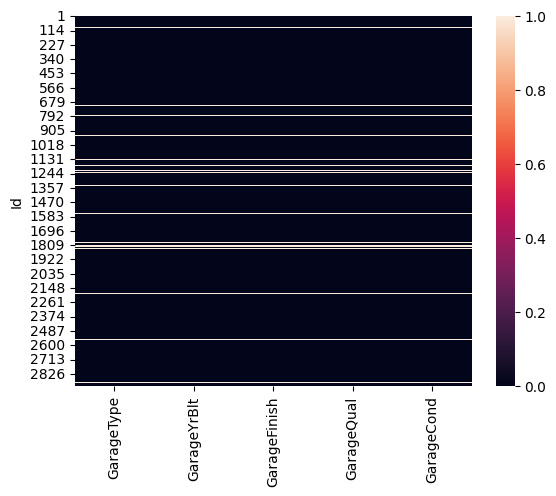

In [45]:
sns.heatmap(df[garage_features.index].isnull())

#### **Observations**
We can see that the missing values in GarageYrBlt,GarageFinish,GarageQual and GarageCond coincide with missing values in GarageType indicating that we can fill them with a constant such as "Not available"

Since there are a lot of categorical features where we need to impute a constant value, let us create a list of such features.

In [46]:
#creating list of categorical features where we need to add "NA" as a constant value
feat_cat_constant=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]

#### **6.1.2 Segregating missing values by datatype**

In [47]:
#Checking total features with missing values
null_perc=df.isnull().sum()/df.shape[0]*100
total_missing_val_feat=null_perc[null_perc>0]
print("Total features having missing values is:",len(total_missing_val_feat))
total_missing_val_feat

Total features having missing values is: 35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePriceLog    49.982871
dtype: float64

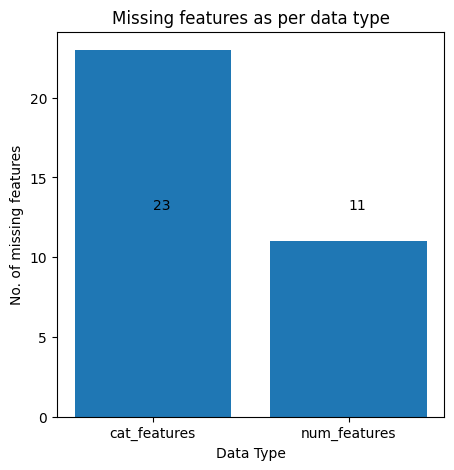

In [48]:
# checking how many missing features are of numeric type and categorical type.
missing_val_num_feat=total_missing_val_feat[total_missing_val_feat.keys().isin(num_cols)].index
missing_val_cat_feat=total_missing_val_feat[total_missing_val_feat.keys().isin(cat_cols)].index

y2=[len(missing_val_cat_feat),
   len(missing_val_num_feat)]
x2=["cat_features","num_features"]
fig2=plt.figure(figsize=(5,5))
plt.title("Missing features as per data type")
plt.xlabel("Data Type")
plt.ylabel("No. of missing features")
plt.bar(x2,y2)
for i in range(len(y2)):
               plt.text(i,min(y2)+2,y2[i])

In [49]:
#creating backup for data imputation
df1 = df.copy()
df1.shape

(2919, 80)

### **6.1.3 Checking remaining categorical features with missing values**

In [50]:
remaining_missing_cat_feat=missing_val_cat_feat[~missing_val_cat_feat.isin(feat_cat_constant)]

In [51]:
for i in remaining_missing_cat_feat:
    print(df1[i].value_counts())
    print("-"*50)

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
--------------------------------------------------
Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
--------------------------------------------------
Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
--------------------------------------------------
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64
--------------------------------------------------
MasVnrType
BrkFace    879
Stone      249
Br

#### **Observations**
The feature "BsmtQual" has a condition No basement against which entries have been taken as null. These have to be imputed with a constant "NA". Also other features pertaining to basement have these null entires as a house without basement will have null entires for all basement related features. we can verify this with a heatmap

In [52]:
basement_features=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

<Axes: ylabel='Id'>

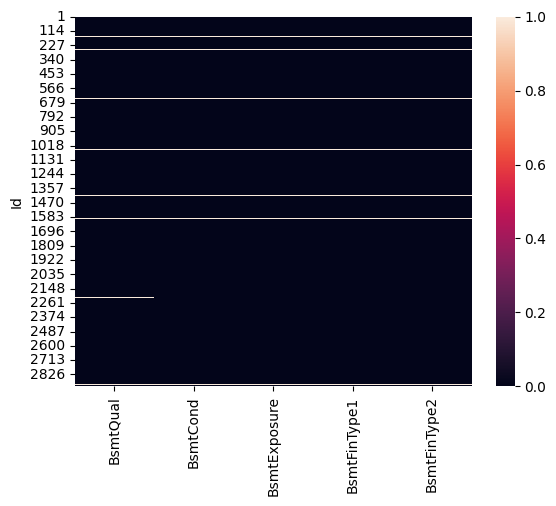

In [53]:
sns.heatmap(df1[basement_features].isnull())

In [54]:
df1[basement_features].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

We will be adding these 5 features to the list feat_cat_constant

In [55]:
feat_cat_constant=feat_cat_constant+basement_features
len(feat_cat_constant)

14

### **6.1.4 Imputing categorical features**

Imputing below categorical features with constant "Not available"

'Alley','PoolQC','Fence','MiscFeature','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'

In [56]:
#defining function for imputation
const_na = "NA"
def impute_constant_na(feature):
    df1[feature].replace(np.nan,const_na,inplace=True)
    print("null values for",feature,"in new data = ",df1[feature].isnull().sum())

In [57]:
#Imputing missing values
for i in feat_cat_constant:
    impute_constant_na(i)

null values for Alley in new data =  0
null values for PoolQC in new data =  0
null values for Fence in new data =  0
null values for MiscFeature in new data =  0
null values for FireplaceQu in new data =  0
null values for GarageType in new data =  0
null values for GarageFinish in new data =  0
null values for GarageQual in new data =  0
null values for GarageCond in new data =  0
null values for BsmtQual in new data =  0
null values for BsmtCond in new data =  0
null values for BsmtExposure in new data =  0
null values for BsmtFinType1 in new data =  0
null values for BsmtFinType2 in new data =  0


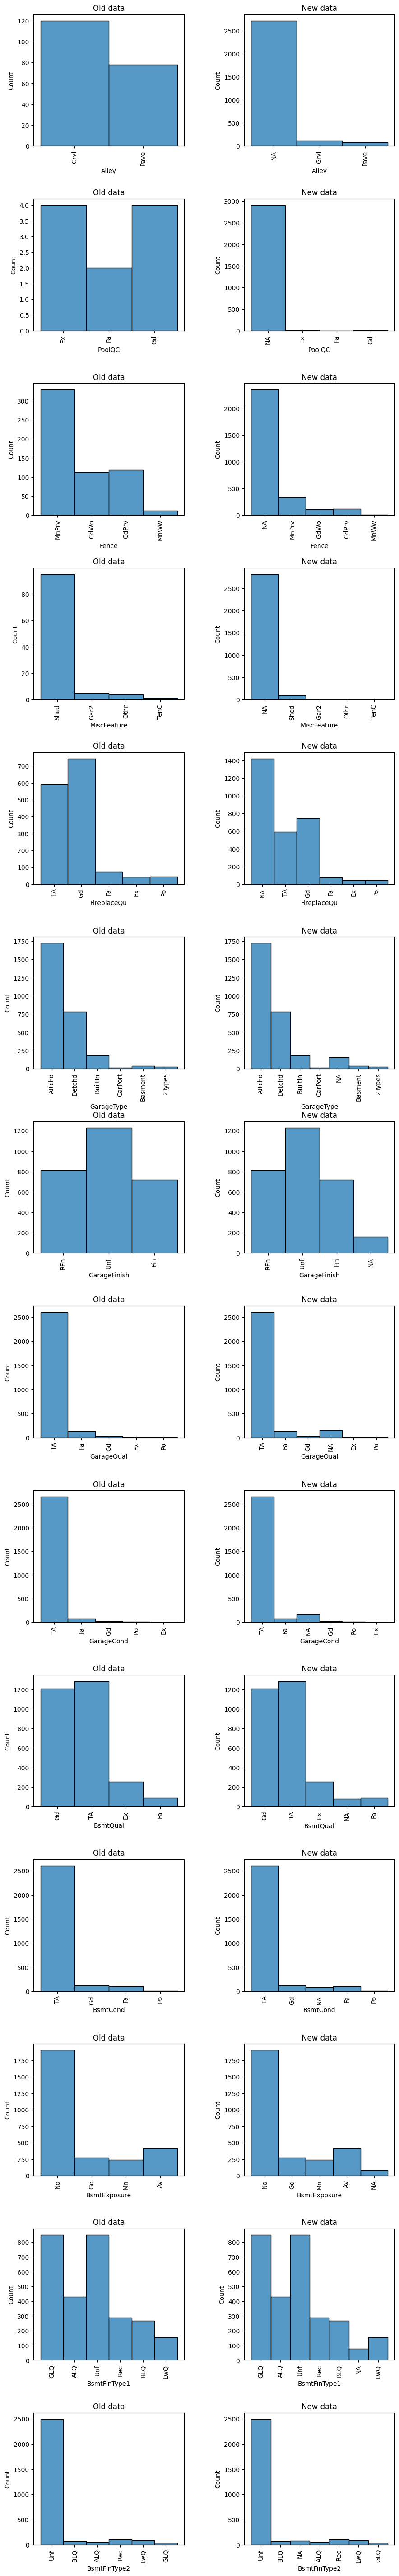

In [58]:
# Checking data distribution before and after imputation
j=1
plt.figure(figsize=(10,70))
for i in feat_cat_constant:
    plt.subplot(len(feat_cat_constant),2,j)
    sns.histplot(df[i])
    plt.title("Old data")
    plt.xticks(rotation='vertical')
    plt.subplot(len(feat_cat_constant),2,j+1)
    sns.histplot(df1[i])
    plt.title("New data")
    plt.xticks(rotation='vertical')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    j=j+2

Now lets us drop the features which we have imputed and update the list of remaining categorical features with missing values

In [59]:
remaining_missing_cat_feat

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [60]:
basement_features

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [61]:
#creating a list of remaining categorical features with null values
remaining_missing_cat_feat=remaining_missing_cat_feat.drop(basement_features)

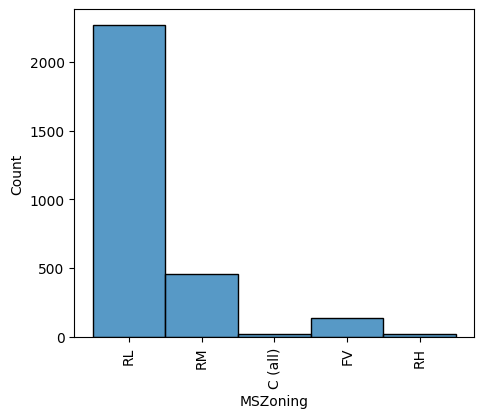

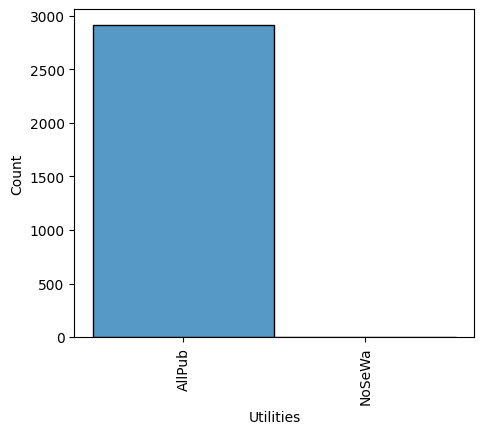

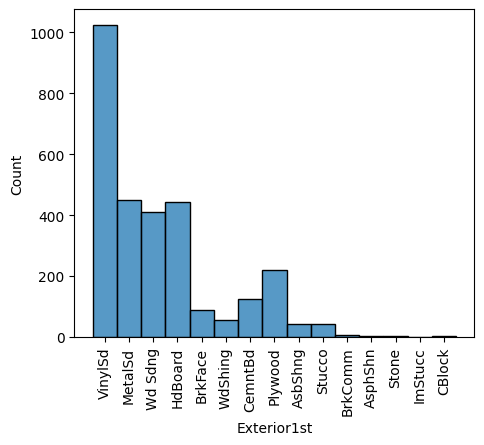

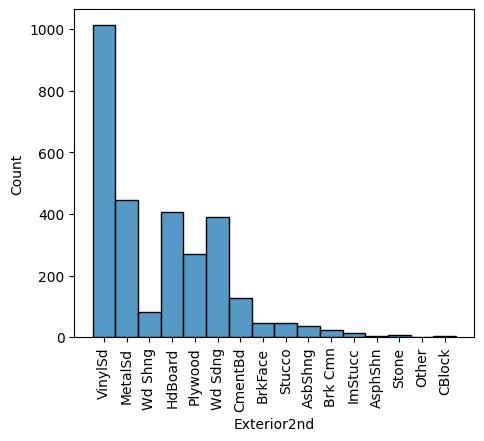

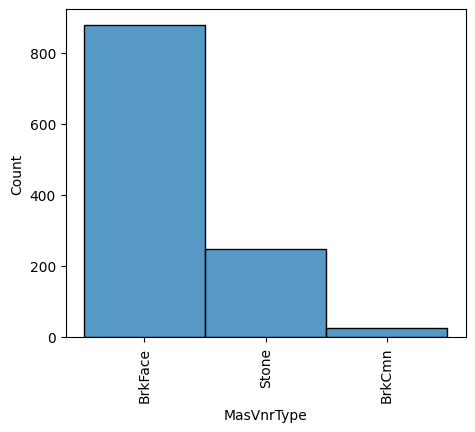

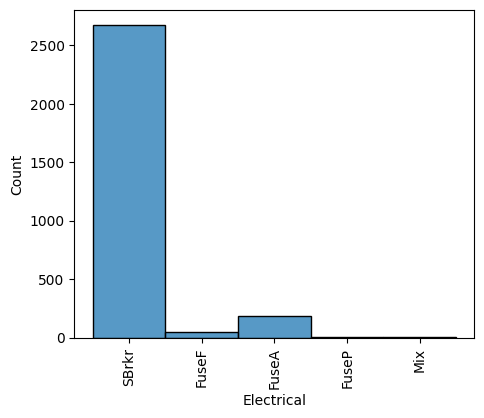

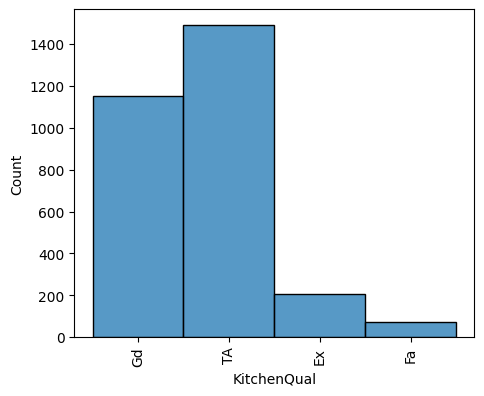

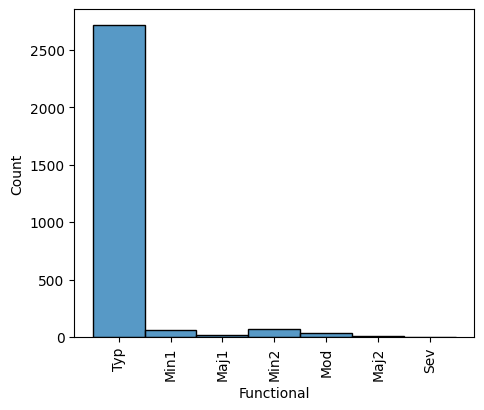

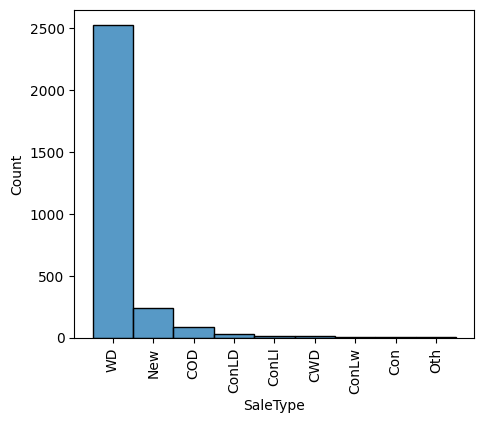

In [62]:
#checking distribution for remaining features
l=1
for i in remaining_missing_cat_feat:
    plt.figure(figsize=(5,50))
    plt.subplot(len(remaining_missing_cat_feat),1,l)
    sns.histplot(df1[i])
    plt.xticks(rotation="vertical")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    l=l+1

#### **Observations**

In almost all of the features above, we can see that one of the attributes in a particular feature is significant. We will use this attribute to impute missing values in these features.

Let us create a dictionary of variables that will be used to store the mode value for each feature. We will be using these mode values to impute existing missing values as well as any new data with missing values

In [63]:
#displaying list of remaining catergorical features with missing values
remaining_missing_cat_feat

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [64]:
const_modes={"MSZoning_mode":"",
                     "Utilities_mode":"",
                     "Exterior1st_mode":"",
                     "Exterior2nd_mode":"",
                     "MasVnrType_mode":"",
                     "Electrical_mode":"",
                     "KitchenQual_mode":"",
                     "Functional_mode":"",
                     "SaleType_mode":""}

In [65]:
const_modes_keys=list(const_modes.keys())

In [66]:
#filling above dictionary values with mode values
a=0
for i in remaining_missing_cat_feat:
    const_modes[const_modes_keys[a]]=df1[i].mode()[0]
    a=a+1

In [67]:
#checking values of the dictionary
const_modes

{'MSZoning_mode': 'RL',
 'Utilities_mode': 'AllPub',
 'Exterior1st_mode': 'VinylSd',
 'Exterior2nd_mode': 'VinylSd',
 'MasVnrType_mode': 'BrkFace',
 'Electrical_mode': 'SBrkr',
 'KitchenQual_mode': 'TA',
 'Functional_mode': 'Typ',
 'SaleType_mode': 'WD'}

In [68]:
#filling missing values
b=0
for i in remaining_missing_cat_feat:
    df1[i].replace(np.nan,const_modes[const_modes_keys[b]],inplace=True)
    b=b+1
    print("The number of missing values in the feature",i,"=",df1[i].isnull().sum())

The number of missing values in the feature MSZoning = 0
The number of missing values in the feature Utilities = 0
The number of missing values in the feature Exterior1st = 0
The number of missing values in the feature Exterior2nd = 0
The number of missing values in the feature MasVnrType = 0
The number of missing values in the feature Electrical = 0
The number of missing values in the feature KitchenQual = 0
The number of missing values in the feature Functional = 0
The number of missing values in the feature SaleType = 0


### **6.1.5 Imputation of Numeric features**

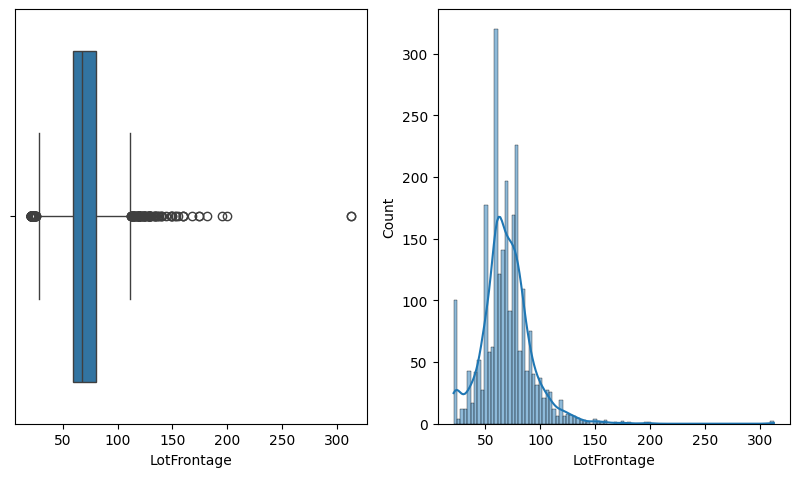

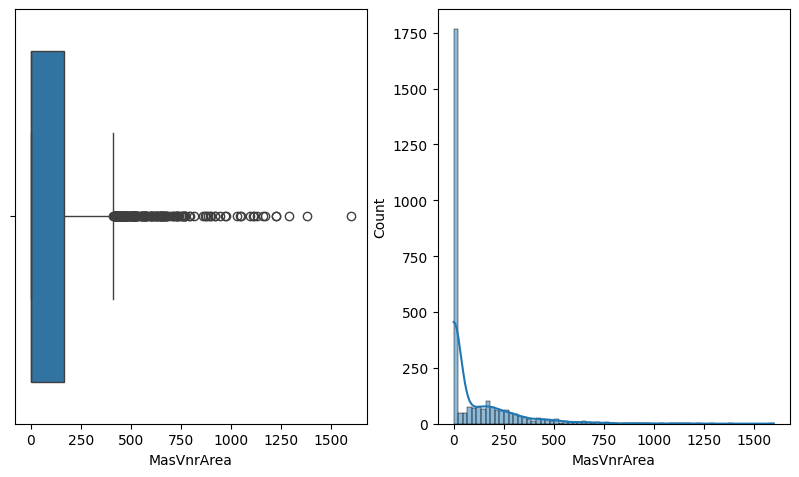

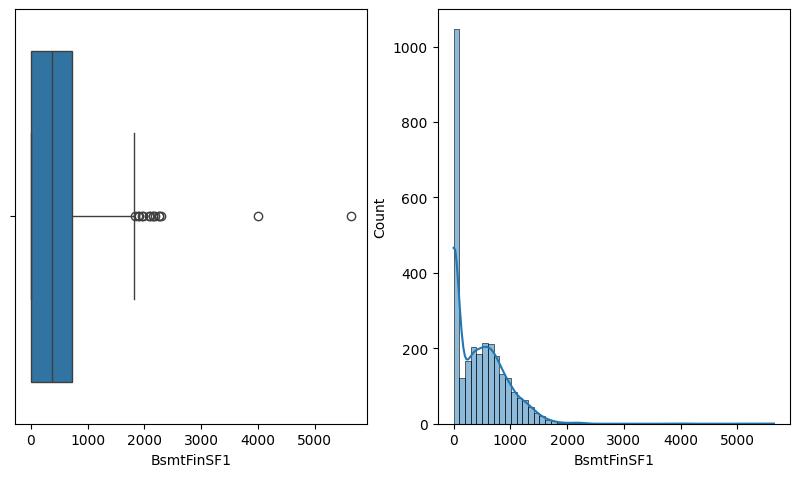

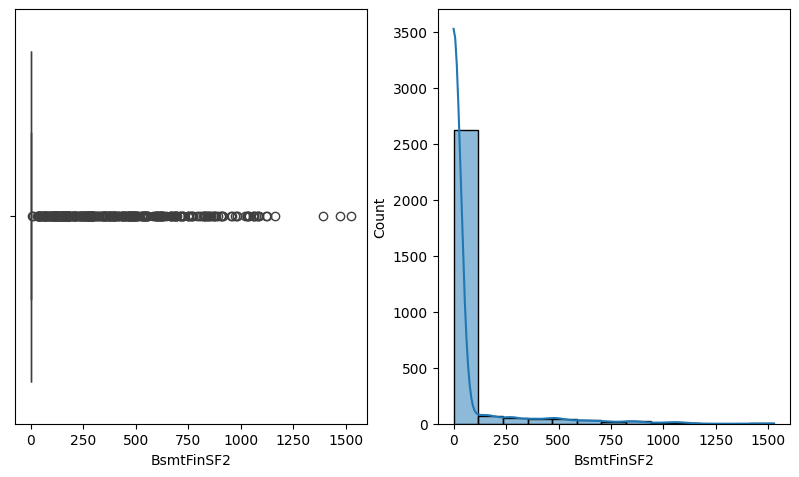

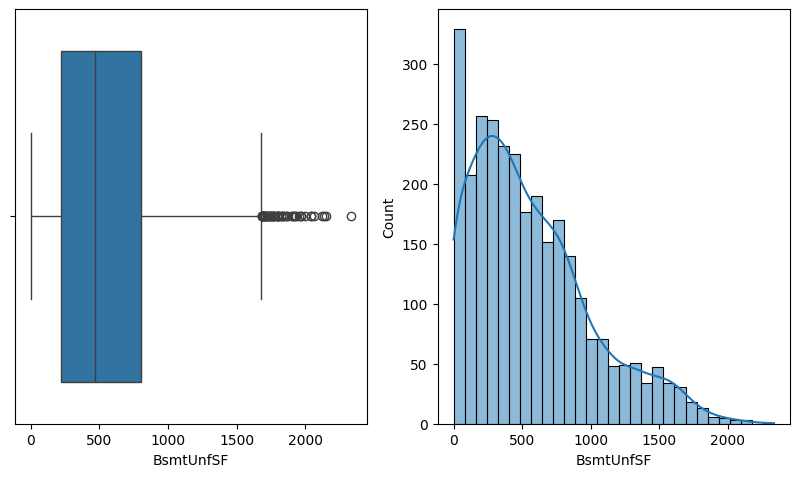

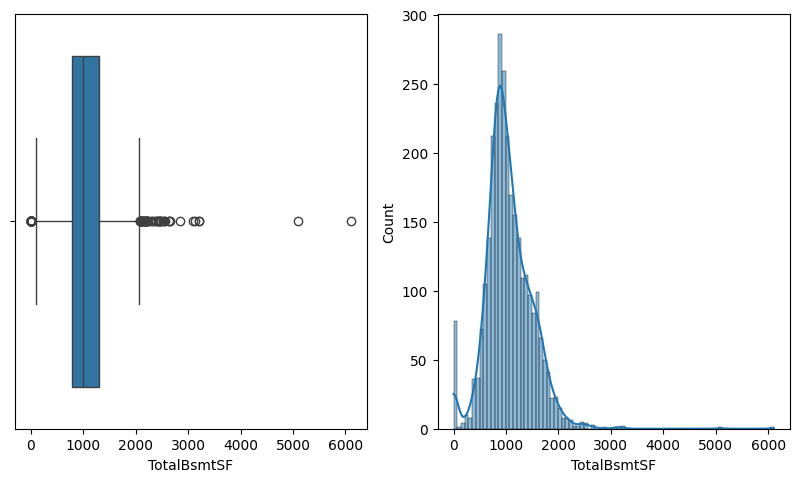

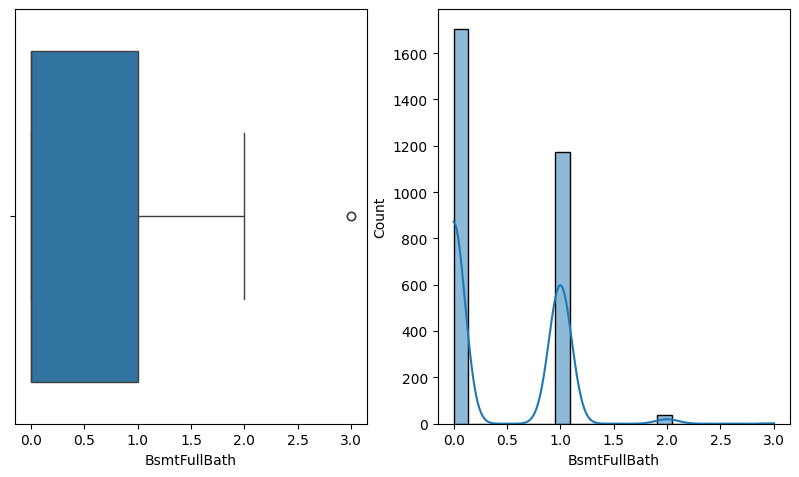

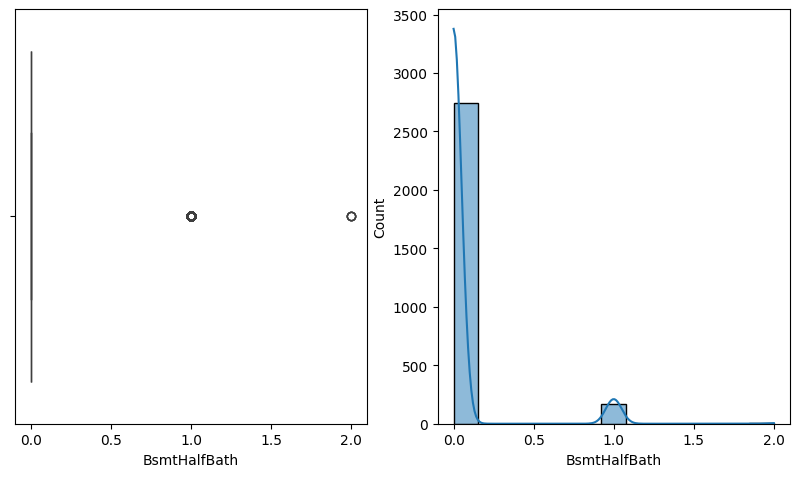

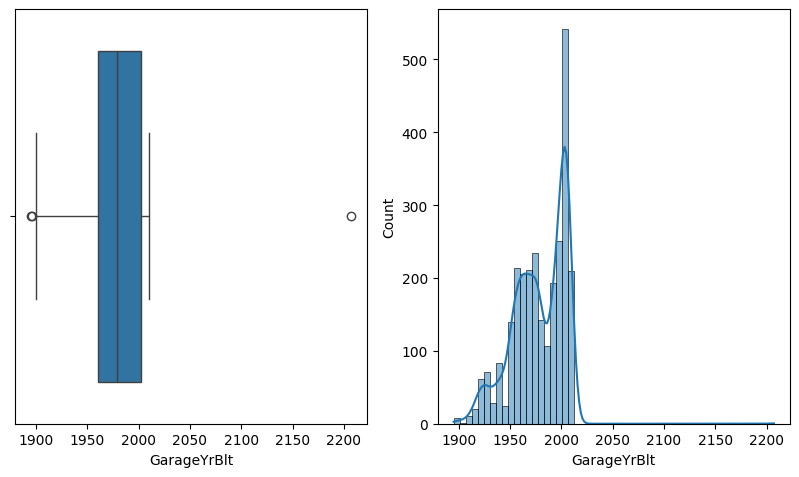

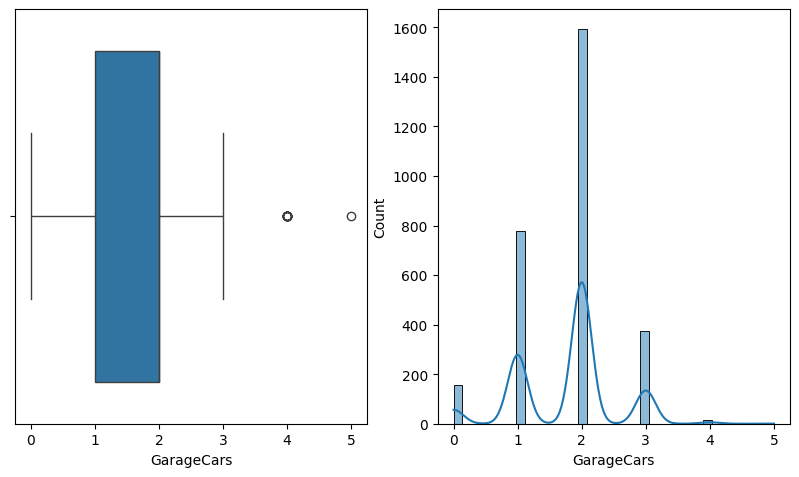

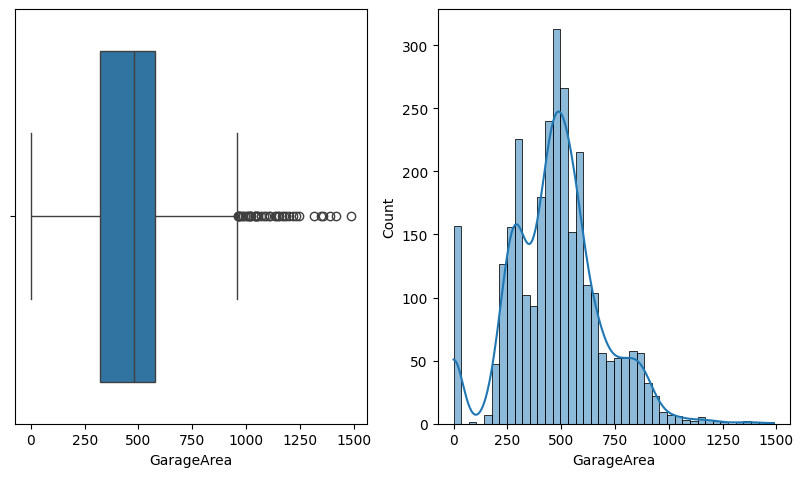

In [69]:
#checking data distribution for numeric features
k=1
for i in missing_val_num_feat:
    plt.figure(figsize=(10,70))
    plt.subplot(len(missing_val_num_feat),2,k)
    sns.boxplot(x=df[i])
    plt.subplot(len(missing_val_num_feat),2,k+1)
    sns.histplot(x=df[i],kde=True)
    k=k+2


In the numerical features with missing values, there are some feature which are related to catergorical features. For example, we have basement features in both numerical and categorical sections. Same is the case with garage.

We can compare the numeric and categorical features for basement related features and garage related features in order to use the correct imputation method

#### **Imputing numeric basement features**

In [70]:
#creating dataframe for basement related features (numeric + categorical)
bsmt_numeric=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]
bsmt_cat=basement_features
df_bsmt=df[bsmt_numeric+bsmt_cat]

In [71]:
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,,,,,,,
18,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
40,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
91,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
103,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
157,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
183,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
260,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
333,1124.0,479.0,1603.0,3206.0,1.0,0.0,Gd,TA,No,GLQ,NaN
343,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


From the table above, we can see that whenever the categorical features are available, there are some values in numeric features. However the numeric features are "0" when the categorical features are not available.

In [72]:
# checking corresponding categorical columns for numeric columns with missing values
df1_bsmt=df1[bsmt_numeric+bsmt_cat]

In [73]:
df1_bsmt[df1_bsmt.isnull().any(axis=1)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NA,NA
2189,0.0,0.0,0.0,0.0,NaN,NaN,NA,NA,NA,NA,NA


We can see that the corresponding categorical values are not available and thus we can impute the missing values for numeric features with "0"

In [74]:
# Imputing numeric features pertaining to basement with "0"
const_zero = 0
for i in bsmt_numeric:
    df1[i].replace(np.nan,const_zero,inplace=True)
    print("The number of missing values for the feature",i,"=",df1[i].isnull().sum())

The number of missing values for the feature BsmtFinSF1 = 0
The number of missing values for the feature BsmtFinSF2 = 0
The number of missing values for the feature BsmtUnfSF = 0
The number of missing values for the feature TotalBsmtSF = 0
The number of missing values for the feature BsmtFullBath = 0
The number of missing values for the feature BsmtHalfBath = 0


#### **Imputing numeric garage features**

In [75]:
# creating dataframe from garage related features
garage_numeric=['GarageYrBlt', 'GarageCars', 'GarageArea']
garage_cat=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df1_garage=df1[garage_numeric+garage_cat]

In [76]:
df1_garage[df1_garage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NA,NA,NA,NA
49,NaN,0.0,0.0,NA,NA,NA,NA
79,NaN,0.0,0.0,NA,NA,NA,NA
89,NaN,0.0,0.0,NA,NA,NA,NA
90,NaN,0.0,0.0,NA,NA,NA,NA
100,NaN,0.0,0.0,NA,NA,NA,NA
109,NaN,0.0,0.0,NA,NA,NA,NA
126,NaN,0.0,0.0,NA,NA,NA,NA
128,NaN,0.0,0.0,NA,NA,NA,NA


From above data we can see that the garage area for those house with no garage is 0 and corresponding categorical features are also not available. Thus we can fill the missing values in GarageYrBlt,GarageCars and GarageArea with 0 as these houses have no garage.

In [77]:
# Imputing numeric garage features
const_Num_Garage=0
for i in garage_numeric:
    df1[i].replace(np.nan,const_Num_Garage,inplace=True)
    print("The number of missing values in the feature",i,"=",df1[i].isnull().sum())

The number of missing values in the feature GarageYrBlt = 0
The number of missing values in the feature GarageCars = 0
The number of missing values in the feature GarageArea = 0


#### **Imputing LotFrontage**

From the histogram and the boxplot for LotFrontage, we can see that there are a significant number of outliers and that the histogram is skewed to the right. Thus we will ignore the mean value and take median instead

In [78]:
# Imputing LotFrontage with median value
const_LotFrontage = df["LotFrontage"].median()
df1["LotFrontage"].replace(np.nan,const_LotFrontage,inplace=True)
print("The number of missing values in the feature LotFrontage =",df1["LotFrontage"].isnull().sum())

The number of missing values in the feature LotFrontage = 0


#### **Imputing MasVnrArea**

From the histogram and boxplot for MasVnrArea, we can see that there a large number of outliers and the graph is heavily skewed on the right. Also a large amount of data is cluseterd to the extreme right at value 0. So instead of imputing missing values with mean or median, we will use mode.

In [79]:
# Imputing MasVnrArea with mode value
const_MasVnrArea = df["MasVnrArea"].mode()[0]
df1["MasVnrArea"].replace(np.nan,const_MasVnrArea,inplace=True)
print("The number of missing values for the feature MasVnrArea=",df1["MasVnrArea"].isnull().sum())

The number of missing values for the feature MasVnrArea= 0


### **6.2 Feature Transformation**

### **6.2.1  Converting Numerical Features to Categoricals Features**

Some of the features which are numeric can be best worked with as categorical and thus we will first convert them to categorical before converting them to numeric again

In [80]:
# Creating a list of numerical features to be converted to categorical features
conv_to_num = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [81]:
# checking datatypes for the above features
for i in conv_to_num:
    print(f"{i}: data type ={df1[i].dtype}")

MSSubClass: data type =int64
YearBuilt: data type =int64
YearRemodAdd: data type =int64
GarageYrBlt: data type =float64
MoSold: data type =int64
YrSold: data type =int64


In [82]:
#checking entires in the above features
df1[conv_to_num].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [83]:
# Handling MoSold

# Checking unique values in MoSold
df1["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [84]:
# Converting Months from numeric to str
df1["MoSold"] = df1["MoSold"].apply(lambda x: calendar.month_abbr[x])
df1["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [85]:
# Coneverting numeric to string for above features
for i in conv_to_num:
    df1[i]=df1[i].astype(str)

In [86]:
for i in conv_to_num:
    print(f"{i}: data type ={df1[i].dtype}")

MSSubClass: data type =object
YearBuilt: data type =object
YearRemodAdd: data type =object
GarageYrBlt: data type =object
MoSold: data type =object
YrSold: data type =object


### **6.2.2 Converting categorical features to numerical by Ordinal Encoding**

##### We will use Ordinal encoding to convert those categorical features which can be ranked to numeric

In [87]:
# creating a dictionary of categorical features for ordinal encoding
cat_num_ordinal={"ExterQual":["Po","Fa","TA","Gd","Ex"],
                 "ExterCond":["Po","Fa","TA","Gd","Ex"],
                 "BsmtQual":["NA","Po","Fa","TA","Gd","Ex"],
                 "BsmtCond":["NA","Po","Fa","TA","Gd","Ex"],
                 "BsmtExposure":["NA","No","Mn","Av","Gd"],
                 "BsmtFinType1":["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
                 "BsmtFinType2":["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
                 "HeatingQC":["Po","Fa","TA","Gd","Ex"],
                 "KitchenQual":["Po","Fa","TA","Gd","Ex"],
                 "FireplaceQu":["NA","Po","Fa","TA","Gd","Ex"],
                 "GarageQual":["NA","Po","Fa","TA","Gd","Ex"],
                 "GarageCond":["NA","Po","Fa","TA","Gd","Ex"],
                 "PoolQC":["NA","Fa","TA","Gd","Ex"],
                 "Utilities":["ELO","NoSeWa","NoSeWr","AllPub"],
                 "PavedDrive":["N","P","Y"],
                 "GarageFinish":["NA","Unf","RFn","Fin"]}

In [88]:
cat_num_ordinal_keys=list(cat_num_ordinal.keys())

In [89]:
cat_num_ordinal_values=list(cat_num_ordinal.values())

In [90]:
# Ordinal encoding of categorical features
for i in range(len(cat_num_ordinal_keys)):
    df1[cat_num_ordinal_keys[i]]=df1[cat_num_ordinal_keys[i]].astype(CategoricalDtype(categories=cat_num_ordinal_values[i],ordered=True)).cat.codes

In [91]:
#checking value counts after ordinal encoding
for i in range(len(cat_num_ordinal_keys)):
    print(df1[cat_num_ordinal_keys[i]].value_counts())
    print("-"*50)

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64
--------------------------------------------------
ExterCond
2    2538
3     299
1      67
4      12
0       3
Name: count, dtype: int64
--------------------------------------------------
BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64
--------------------------------------------------
BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64
--------------------------------------------------
BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64
--------------------------------------------------
BsmtFinType1
1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: count, dtype: int64
--------------------------------------------------
BsmtFinType2
1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: count, dtype: int64
--------------------------------------------------
HeatingQC
4

## **Converting remaining categorical features to numeric by Nominal Encoding**

##### For remaining object type data we will use get_dummies to convert to numeric

In [92]:
#checking info of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

We can see that 33 of the 80 features are object type.

In [93]:
#creating copy of dataframe for nominal encoding
df2=df1.copy()

In [94]:
#creating list of object type features for one hot encoding
nomial_encod_obj=df2.select_dtypes("object").columns.to_list()
print("Features: \n",nomial_encod_obj)

Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [95]:
#checking first 5 entries for these features
df2[nomial_encod_obj].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,BrkTil,GasA,Y,SBrkr,Typ,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [96]:
#Applying nominal encoding
print("Shape of dataframe before nominal encoding:",df2.shape)
df2 = pd.get_dummies(df2,columns=nomial_encod_obj,prefix=nomial_encod_obj,drop_first=True)
print("Shape of dataframe after nominal encoding:",df2.shape)

Shape of dataframe before nominal encoding: (2919, 80)
Shape of dataframe after nominal encoding: (2919, 517)


In [97]:
#checking first 5 entries of dataframe after nominal encoding
df2.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePriceLog,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearR

In [98]:
#checking if any object type columns are present
df2.select_dtypes("object").columns.to_list()

[]

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 517 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(470), float64(11), int64(20), int8(16)
memory usage: 2.1 MB


### **6.3 Feature Scaling**

In [100]:
#checking shape of dataframe
df2.shape

(2919, 517)

In [101]:
len_train=train_df.shape[0]
len_train

1460

In [102]:
# separating dependent variable from independent variables
X_train=df2[:len_train].drop("SalePriceLog",axis=1)
y_train=df2["SalePriceLog"][:len_train]
X_test=df2[len_train:].drop("SalePriceLog",axis=1)

print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (1460, 516)
Shape of y_train: (1460,)
Shape of X_test: (1459, 516)


In [103]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## **7. Model Training**

In [104]:
# Defining regression models
svr = SVR()
lin_reg=LinearRegression()
sgd_reg=SGDRegressor()
kn_reg = KNeighborsRegressor()
gp_reg = GaussianProcessRegressor()
dt_reg = DecisionTreeRegressor()
gb_reg = GradientBoostingRegressor()
rf_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()
mlp_reg = MLPRegressor()


In [105]:
# creating a dictionary of models
models = {"LinearRegression":lin_reg,
          "SVR":svr,
          "SGDRegressor":sgd_reg,
          "KNeighborsRegressor":kn_reg,
          "GaussianProcessRegressor":gp_reg,
          "DecisionTreeRegressor":dt_reg,
          "GradientBoostingRegressor":gb_reg,
          "RandomForestRegressor":rf_reg,
          "XGBRegressor":xgb_reg,
          "MLPRegressor":mlp_reg,
          }

In [106]:
# defining function for model training
def test_model_r2(model,X_train=X_train,y_train=y_train):
  cv=KFold(n_splits=7,shuffle=True,random_state=45)
  r2=make_scorer(r2_score)
  r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
  score=[r2_val_score.mean()]
  return score

def test_model_rmse(model,X_train=X_train,y_train=y_train):
  cv=KFold(n_splits=7,shuffle=True,random_state=45)
  mse=make_scorer(mean_squared_error)
  mse_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=mse)
  score=[np.sqrt(mse_val_score.mean())]
  return score


In [107]:
#model training
model_score_r2=[]
model_score_rmse=[]
for i in range(len(models)):
  print("Model Name:",list(models.keys())[i])
  print("-"*50)
  score_r2=test_model_r2(list(models.values())[i],X_train,y_train)
  score_rmse=test_model_rmse(list(models.values())[i],X_train,y_train)
  print("r2_Score of the model:",score_r2)
  print("rmse of the model:",score_rmse)
  print("="*50)
  model_score_r2.append(score_r2)
  model_score_rmse.append(score_rmse)

Model Name: LinearRegression
--------------------------------------------------
r2_Score of the model: [-8.437601524020049e+24]
rmse of the model: [1148242894804.3765]
Model Name: SVR
--------------------------------------------------
r2_Score of the model: [0.7781245555097297]
rmse of the model: [0.18867352341551955]
Model Name: SGDRegressor
--------------------------------------------------
r2_Score of the model: [-780056.1814145624]
rmse of the model: [193.7146768880222]
Model Name: KNeighborsRegressor
--------------------------------------------------
r2_Score of the model: [0.6022135171106535]
rmse of the model: [0.2513335331644192]
Model Name: GaussianProcessRegressor
--------------------------------------------------
r2_Score of the model: [-920.3619745320866]
rmse of the model: [12.02244960763615]
Model Name: DecisionTreeRegressor
--------------------------------------------------
r2_Score of the model: [0.7292304371198668]
rmse of the model: [0.20412935370433097]
Model Name: G

## **8. Model Selection**

In [108]:
# creating a dataframe for model scores
model_performance=pd.DataFrame(list(zip(models,model_score_r2,model_score_rmse)),columns=["Model Name","R2_Score","RMSE"]).sort_values(by=["RMSE"])
model_performance

,Model Name,R2_Score,RMSE
6,GradientBoostingRegressor,[0.8877928808818744],[0.13308394299861176]
7,RandomForestRegressor,[0.8671587005234728],[0.14459593379614766]
8,XGBRegressor,[0.8617767331558257],[0.14801390520533733]
1,SVR,[0.7781245555097297],[0.18867352341551955]
5,DecisionTreeRegressor,[0.7292304371198668],[0.20412935370433097]
3,KNeighborsRegressor,[0.6022135171106535],[0.2513335331644192]
9,MLPRegressor,[-79.0525110911042],[3.349177903783561]
4,GaussianProcessRegressor,[-920.3619745320866],[12.02244960763615]
2,SGDRegressor,[-780056.1814145624],[193.7146768880222]
0,LinearRegression,[-8.437601524020049e+24],[1148242894804.3765]


#### **Observations:**
The top 3 models by r2_score are "GradientBoostingRegressor"," RandomForestRegressor" and "XBGBoostRegressor".
##### We will use **"GradientBoostingRegressor"**.

### **8.1 Hyperparameter tuning**

In [109]:
# Finding optimum parameters
model_tuned=GridSearchCV((gb_reg),
          {
          "criterion":["squared_error"],
          "learning_rate":[0.5,0.1,0.05,0.01],
          "n_estimators":[50,100,200,500],
          "max_depth":[5,8,10],
          "max_features":["sqrt"]
           },
           cv=5)

In [110]:
# fiting the model
model_tuned.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [5, 8, 10], 'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200, 500]})

In [111]:
# checking results for hyperparameter tuning
model_tuned_df=pd.DataFrame(model_tuned.cv_results_)
model_tuned_df.sort_values(by=["rank_test_score"]).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,1.340932,0.132507,0.009810,0.006529,squared_error,0.05,5,sqrt,500,"{'criterion': 'squared_error', 'learning_rate'...",0.910905,0.887917,0.890928,0.906713,0.900774,0.899447,0.008847,1
26,0.788011,0.099451,0.005431,0.004753,squared_error,0.05,5,sqrt,200,"{'criterion': 'squared_error', 'learning_rate'...",0.910142,0.882673,0.886887,0.901709,0.892205,0.894723,0.009995,2
14,0.510509,0.029807,0.001413,0.002827,squared_error,0.1,5,sqrt,200,"{'criterion': 'squared_error', 'learning_rate'...",0.903666,0.880203,0.883599,0.893121,0.906125,0.893343,0.010369,3
13,0.279988,0.036296,0.000865,0.001184,squared_error,0.1,5,sqrt,100,"{'criterion': 'squared_error', 'learning_rate'...",0.907323,0.879825,0.882655,0.893034,0.900163,0.892600,0.010356,4
15,1.786754,0.386633,0.005535,0.003284,squared_error,0.1,5,sqrt,500,"{'criterion': 'squared_error', 'learning_rate'...",0.903621,0.869087,0.890676,0.896647,0.900474,0.892101,0.012290,5


#### **Observations**

The optimal parameters after tuning the model are as below:
1. Criterion : squared_error
2. Learning rate: 0.05
3. max_depth: 5
4. max_features: sqrt
5. n_estimators: 500

### **8.2 Fitting the tuned model**

In [112]:
# defining parameter for the model
gb_reg_tuned=GradientBoostingRegressor(
                                      criterion="squared_error",
                                      learning_rate=0.05,
                                      max_depth=5,
                                      max_features="sqrt",
                                      n_estimators=500
                                      )

In [113]:
# fiting the model
gb_reg_tuned.fit(X_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.05,
                          max_depth=5, max_features='sqrt', n_estimators=500)

In [114]:
#checking r2_score of tuned model
test_model_r2(gb_reg_tuned,X_train,y_train)

[0.8948017071496774]

In [115]:
#checking rmse of tuned model
test_model_rmse(gb_reg_tuned,X_train,y_train)

[0.12884004702104182]

#### **Observations**
##### We can see that both r2_score and rmse for the model have improved after hyperparameter tuning

In [116]:
#predicting values for test set
y_pred=gb_reg_tuned.predict(X_test)

In [117]:
#predicting SalePrices for test set
test_sale_price=list(np.exp(y_pred))
house_id=list(test_df["Id"])
test_set_predictions=pd.DataFrame(list(zip(house_id,test_sale_price)),columns=["Id","SalePrice"])
test_set_predictions.head()

,Id,SalePrice
0,1461,120354.628994
1,1462,165791.911427
2,1463,191387.460255
3,1464,193593.784086
4,1465,189122.842357
